Kaggle is an online platform and community for data scientists and machine learning engineers to collaborate, learn, and compete. Owned by Google, it provides tools, datasets, and notebooks for building and sharing machine learning models. Users can join competitions sponsored by organizations to solve real-world problems, find public datasets, and take free courses to build their skills.

Below is a code snippet loading a dataset directly from kaggle using kaggle api.(https://www.youtube.com/watch?v=ByGJQzlzxQg - for a bit of info on api's)

Put briefly api's just connect apps together, this in particular connects colab(or maybe your local machine) with kaggle.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yanmaksi/big-molecules-smiles-dataset") ###The dataset we are using for this notebook

print("Path to dataset files:", path)

100%|██████████| 289k/289k [00:00<00:00, 867kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/yanmaksi/big-molecules-smiles-dataset/versions/1


Now use os library(https://docs.python.org/3/library/os.html) of python to know more on the format with which the dataset is stored as. os module is one which you will come across in many places as long as you keep using python.

https://www.youtube.com/watch?v=tJxcKyFMTGo - For those who want to know more about os

Getting back to our purpose we use os.listdir to get the files available in the given directory(or folder). Notice that the kaggle api returns the path to where it stored the dataset in the previous cell which we store in a python variable namely "path".

In [ ]:
import os

files = os.listdir(path)
print(files)

full_path = path+'/'+files[0]
print(full_path)

['SMILES_Big_Data_Set.csv']
/root/.cache/kagglehub/datasets/yanmaksi/big-molecules-smiles-dataset/versions/1/SMILES_Big_Data_Set.csv


#Downloading and Importing Required Libraries

In [ ]:
!pip install scikit-learn rdkit matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 46.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import rdkit.Chem as Chem
import matplotlib.pyplot as plt
#Import scikit-learn and rdkit functions as required.
#Note that other libraries may also be useful to solve this notebook this is just to guide you into installing and importing in colab.

As you can see it's saved as a csv file so now go ahead and work your magic by using pandas(which you have learnt hopefully) and analyze the dataset as a data scientist.

#Create a pandas dataframe from the dataset and perform the following:
1) Get the top 5 entries of the data.
2) Find out the total number of rows and columns in the data.
3) Find out the empty rows of each column.
4) Explain a way to input into these empty rows and also explain your reasoning behind it.(Bonus, code not needed)
5) Get the datatype of each row

Preferably all the above should be done using pandas functions. Some questions can be grouped together and done by a single pandas function.

In [ ]:
df = pd.read_csv(full_path)

In [ ]:
#1
print(df.head())


                                              SMILES  pIC50  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59   

                                                mol  num_atoms    logP  
0  <rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>         25  4.1591  
1  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>         36  3.6743  
2  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>         23  1.5361  
3  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>         22  0.9510  
4  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>         21  3.2130  


In [ ]:
print(df.head(0))

Empty DataFrame
Columns: [SMILES, pIC50, mol, num_atoms, logP]
Index: []


In [ ]:
#2
df.shape


(16087, 5)

In [ ]:
#3
df.isna().sum()

,0
SMILES,0
pIC50,1050
mol,0
num_atoms,0
logP,0


4. find out the boolean of each index of the matrix obtained, where ever there is true, the place is empty, then find the location of the place and input the value.

In [ ]:
#5
df.dtypes

,0
SMILES,object
pIC50,float64
mol,object
num_atoms,int64
logP,float64


Notice the empty values of pIC50. Many datasets in chemistry tend to be incomplete in some columns due to insufficient data and in such cases the prerocessing steps are also important. The dataset for our main purposes nmrshiftdb2 also has many missing values and the authors of the paper have also detailed their many approaches to filling of these values.

#RDKit

Use RDKit to

1)Visualize the smiles(10 of them should suffice)

2)Get bonds from the mol object.

3)Get num_atoms from mol object.

4)Compute Morgan fingerprints of first two molecules and display their shapes(dimensions).

5)What is Tanimoto similarity?(A simple google search would suffice) Calculate Tanimoto similarity coeffecient between first 2 molecules. Tanimoto similarity is computed on fingerprints of molecules.

6)Plot barplots containing data of different types of bonds and their numbers and different types of atoms and their numbers.(Find out all the atoms present in dataset). Two seperate barplots.

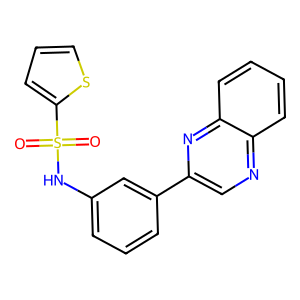

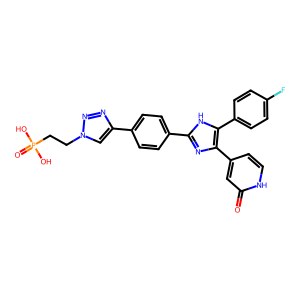

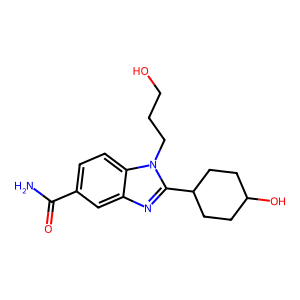

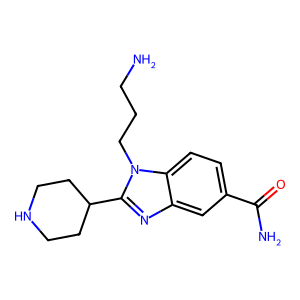

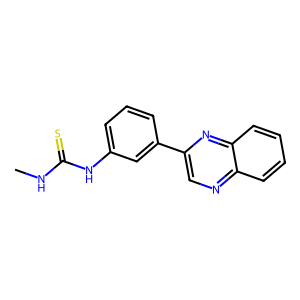

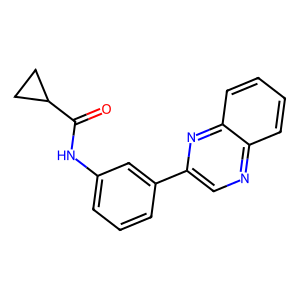

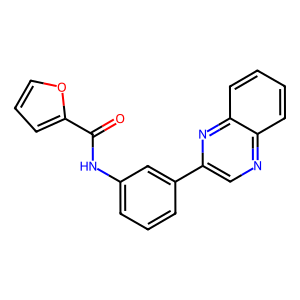

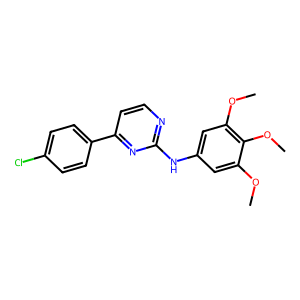

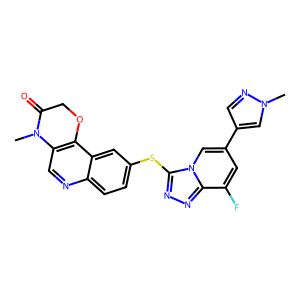

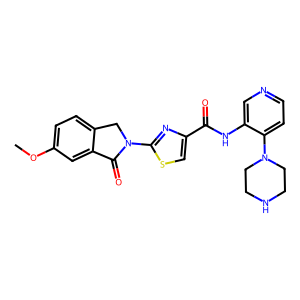

In [ ]:
#1
smiles = df["SMILES"]
for i in range(10):
  mol = Chem.MolFromSmiles(smiles[i])
  mol_img = Chem.Draw.MolToImage(mol)
  display(mol_img)

In [ ]:
#2
mol1 = Chem.MolFromSmiles(smiles[0])
bonds = mol1.GetBonds()
for b in bonds:
    print(b.GetBondType(), b.GetBeginAtom().GetSymbol(),",",b.GetEndAtom().GetSymbol())

DOUBLE O , S
DOUBLE S , O
SINGLE S , N
SINGLE N , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , C
SINGLE C , C
AROMATIC C , C
AROMATIC C , N
AROMATIC N , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , N
AROMATIC C , C
SINGLE S , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , C
AROMATIC C , S
AROMATIC C , C
AROMATIC S , C
AROMATIC N , C
AROMATIC C , C


In [ ]:
#3
num_atoms = mol1.GetNumAtoms()
print(num_atoms)

25


In [ ]:
#4
from rdkit.Chem import rdMolDescriptors
mol2 = Chem.MolFromSmiles(smiles[1])

fp1 = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol1, radius=2, nBits=2048)
fp2 = rdMolDescriptors.GetMorganFingerprintAsBitVect(mol2, radius=2, nBits=2048)

print(fp1.GetNumBits(), fp2.GetNumBits())



2048 2048


[16:16:07] DEPRECATION WARNING: please use MorganGenerator
[16:16:07] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
#5
from rdkit.DataStructs import TanimotoSimilarity
similarity = TanimotoSimilarity(fp1, fp2)
print( similarity)


0.10869565217391304


In [ ]:
#6


#Now Visualize Them
Make a 2D scatter plot of smiles with the axes being the attributes of smiles(pIC50, num_atoms), (pIC50, logP), (num_atoms, logP) and (molecular weight, pIC50).

Report if you found anything to your interest.

Perform PCA and tSNE analysis and make a table summing up the differences between the 2 methods and their similarities. (The table can be submitted seperately)

To perform PCA and t-SNE their functions from scikit-learn library can be used.

https://www.youtube.com/playlist?list=PLblh5JKOoLUJUNlfvCNhJMNjNNpt5ljcR -
Videos 37, 41


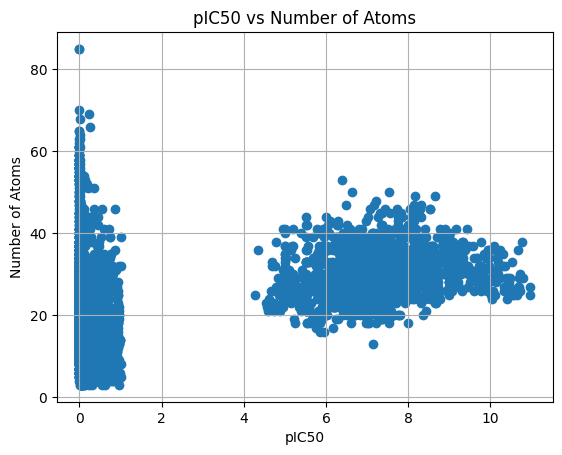

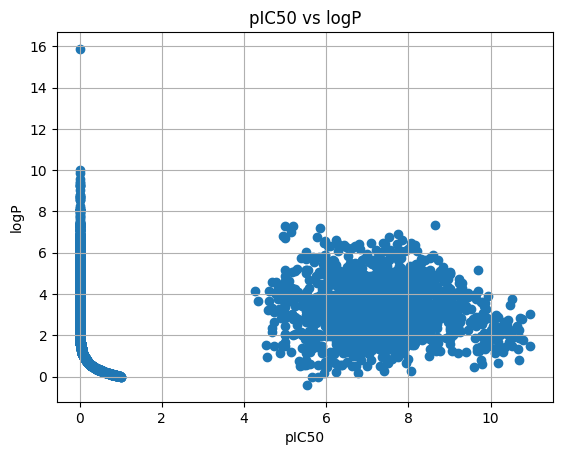

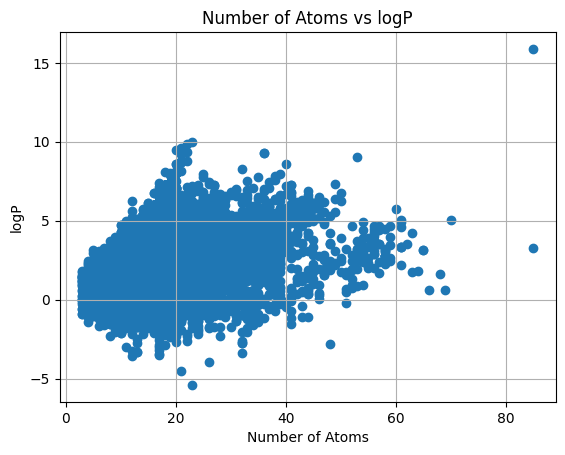

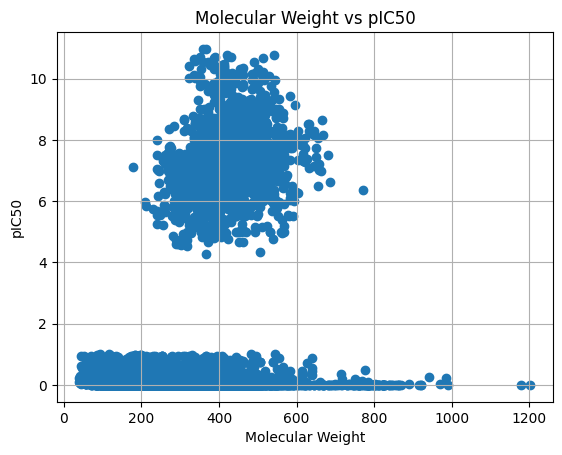

In [ ]:
import matplotlib.pyplot as plt
from rdkit.Chem import Descriptors
smiles=df["SMILES"]
mol_wt_list=[]
for each_smiles in smiles:
 mol = Chem.MolFromSmiles(each_smiles)
 mol_wt = Descriptors.MolWt(mol)
 mol_wt_list.append(mol_wt)
def scatter(x, y, xlabel, ylabel):
    plt.scatter(df[x], df[y])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs {ylabel}")
    plt.grid(True)
    plt.show()

scatter("pIC50", "num_atoms", "pIC50", "Number of Atoms")
scatter("pIC50", "logP", "pIC50", "logP")
scatter("num_atoms", "logP", "Number of Atoms", "logP")

plt.scatter(mol_wt_list,df["pIC50"])
plt.xlabel("Molecular Weight")
plt.ylabel("pIC50")
plt.title("Molecular Weight vs pIC50")
plt.grid(True)
plt.show()


In [ ]:
df["mol_wt"]=mol_wt_list
print(df.head())

                                              SMILES  pIC50  \
0         O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1   4.26   
1  O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...   4.34   
2             NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO   4.53   
3                NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21   4.56   
4                  CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1   4.59   

                                                mol  num_atoms    logP  \
0  <rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>         25  4.1591   
1  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>         36  3.6743   
2  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>         23  1.5361   
3  <rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>         22  0.9510   
4  <rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>         21  3.2130   

    mol_wt  
0  367.455  
1  506.434  
2  317.389  
3  301.394  
4  294.383  


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from rdkit.Chem import rdMolDescriptors

X = df[["num_atoms", "logP", "mol_wt"]].values
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(X_pca)
print(X_pca.shape)

[[ 9.37353795e+01 -2.23865866e-01]
 [ 2.33135476e+02  1.44516773e+00]
 [ 4.36351807e+01  1.37920679e+00]
 ...
 [-2.65741299e+01 -1.82110208e-01]
 [ 3.26110879e+01  9.03930214e-01]
 [-9.29841972e+01  5.49963739e-01]]
(16087, 2)


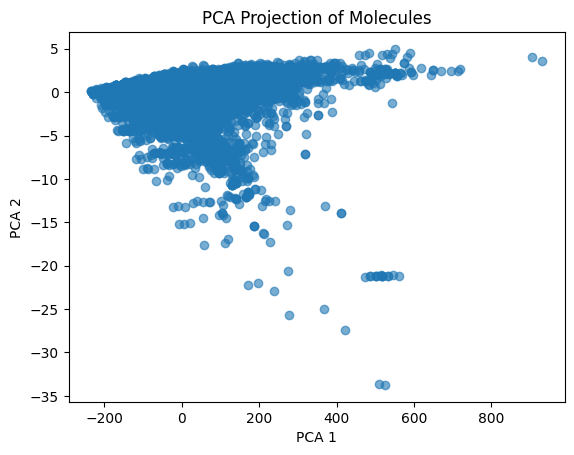

In [ ]:


plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA Projection of Molecules")
plt.show()
